In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import math
from sklearn import cluster
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("../Data/data_cleaned_final.csv",index_col=0)
df

,person id,completed,redeemed,age,income,member_since,female,male,rc_bogo,rc_discount,rd_bogo,rd_discount
0,0009655768c64bdeb2e877511632db8f,3,1,33,72000.0,1351,0,1,1,1,1,1
1,0011e0d4e6b944f998e987f904e8c1e5,3,1,40,57000.0,1088,0,0,1,1,1,1
2,0020c2b971eb4e9188eac86d93036a77,3,1,59,90000.0,1764,1,0,1,1,1,1
3,0020ccbbb6d84e358d3414a3ff76cffd,3,1,24,60000.0,1512,1,0,1,1,1,1
4,003d66b6608740288d6cc97a6903f4f0,3,1,26,73000.0,1290,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14759,fff3ba4757bd42088c044ca26d73817a,3,1,69,83000.0,1930,1,0,1,1,1,1
14760,fff7576017104bcc8677a8d63322b5e1,3,1,71,73000.0,1158,0,1,1,1,1,1
14761,fff8957ea8b240a6b5e634b6ee8eafcf,0,0,71,56000.0,1048,0,1,1,1,0,0
14762,fffad4f4828548d1b5583907f2e9906b,3,1,34,34000.0,1439,0,1,1,0,1,0


In [ ]:
df['z_income'] = (df['income'] - df['income'].mean())/df['income'].std()
df['z_age'] = (df['age'] - df['age'].mean())/df['age'].std()

In [ ]:
df.head()

,person id,completed,redeemed,age,income,member_since,female,male,rc_bogo,rc_discount,rd_bogo,rd_discount,z_income,z_age
0,0009655768c64bdeb2e877511632db8f,3,1,33,72000.0,1351,0,1,1,1,1,1,0.304781,-1.230809
1,0011e0d4e6b944f998e987f904e8c1e5,3,1,40,57000.0,1088,0,0,1,1,1,1,-0.389552,-0.828172
2,0020c2b971eb4e9188eac86d93036a77,3,1,59,90000.0,1764,1,0,1,1,1,1,1.137980,0.264697
3,0020ccbbb6d84e358d3414a3ff76cffd,3,1,24,60000.0,1512,1,0,1,1,1,1,-0.250685,-1.748483
4,003d66b6608740288d6cc97a6903f4f0,3,1,26,73000.0,1290,1,0,0,1,0,1,0.351070,-1.633445


In [ ]:
df.describe()

,completed,redeemed,age,income,member_since,female,male,rc_bogo,rc_discount,rd_bogo,rd_discount,z_income,z_age
count,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,1.476400e+04,1.476400e+04
mean,2.197507,0.811840,54.398131,65415.673259,1412.313127,0.413370,0.572338,0.886074,0.883365,0.603766,0.658223,4.691414e-17,-6.993412e-17
std,1.579179,0.390853,17.385426,21603.475523,419.075494,0.492455,0.494756,0.317732,0.320996,0.489131,0.474321,1.000000e+00,1.000000e+00
min,0.000000,0.000000,18.000000,30000.000000,890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.639351e+00,-2.093600e+00
25%,1.000000,1.000000,42.000000,49000.000000,1098.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-7.598626e-01,-7.131335e-01
50%,2.000000,1.000000,55.000000,64000.000000,1248.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-6.552988e-02,3.461919e-02
75%,3.000000,1.000000,66.000000,80000.000000,1687.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.750917e-01,6.673330e-01
max,6.000000,1.000000,101.000000,120000.000000,2713.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.526646e+00,2.680513e+00


In [ ]:
ss = []

for i in range(2, 11):
    
    model = cluster.KMeans(n_clusters=i, random_state=10)

    clusters = model.fit_predict(df[['z_income','z_age', 'member_since','female','male','redeemed']])
    df['cluster'] = clusters
    centers = model.cluster_centers_
    ss.append(model.inertia_)

print(ss)

[717986417.7808355, 328770418.12401605, 193552913.2188294, 118994574.3237209, 84036932.51540047, 62935215.9937796, 47486813.15713766, 37289052.073351756, 30765263.670485795]


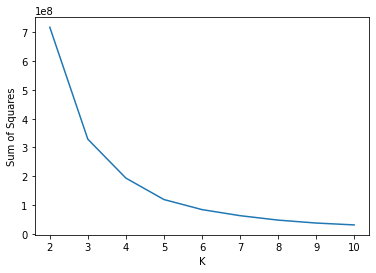

In [ ]:
%matplotlib inline

# plot the elbow plot

data = pd.DataFrame({'K': range(2,11), 
                      'Sum of Squares':ss})

sns.lineplot(data = data, 
             x = 'K', 
             y = 'Sum of Squares')

Text(0.5, 1.0, 'Elbow Plot')

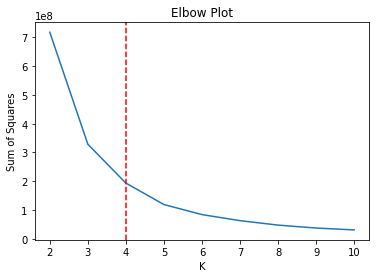

In [ ]:
sns.lineplot(data = data, 
             x = 'K', 
             y = 'Sum of Squares')

plt.axvline(x = 4, color = 'red', linestyle = '--')
plt.title('Elbow Plot')

In [ ]:
model= cluster.KMeans(n_clusters = 4)
#fit the created k-means model to our data
model.fit(df[['z_income','z_age', 'member_since','female','male','redeemed']])

df['cluster'] = model.labels_
df.head(10)

,person id,completed,redeemed,age,income,member_since,female,male,rc_bogo,rc_discount,rd_bogo,rd_discount,z_income,z_age,cluster
0,0009655768c64bdeb2e877511632db8f,3,1,33,72000.0,1351,0,1,1,1,1,1,0.304781,-1.230809,3
1,0011e0d4e6b944f998e987f904e8c1e5,3,1,40,57000.0,1088,0,0,1,1,1,1,-0.389552,-0.828172,1
2,0020c2b971eb4e9188eac86d93036a77,3,1,59,90000.0,1764,1,0,1,1,1,1,1.137980,0.264697,0
3,0020ccbbb6d84e358d3414a3ff76cffd,3,1,24,60000.0,1512,1,0,1,1,1,1,-0.250685,-1.748483,3
4,003d66b6608740288d6cc97a6903f4f0,3,1,26,73000.0,1290,1,0,0,1,0,1,0.351070,-1.633445,3
5,00426fe3ffde4c6b9cb9ad6d077a13ea,1,1,19,65000.0,1606,1,0,0,1,0,1,-0.019241,-2.036081,3
6,004b041fbfe44859945daa2c7f79ee64,2,1,55,74000.0,969,1,0,1,1,1,1,0.397359,0.034619,1
7,004c5799adbf42868b9cff0396190900,5,1,54,99000.0,1737,0,1,1,1,1,1,1.554580,-0.022900,0
8,005500a7188546ff8a767329a2f7c76a,1,1,56,47000.0,1119,0,1,1,1,1,0,-0.852440,0.092139,1
9,0056df74b63b4298809f0b375a304cf4,3,1,54,91000.0,1594,0,1,1,1,1,1,1.184269,-0.022900,3


In [ ]:
df.groupby("cluster").mean()

,completed,redeemed,age,income,member_since,female,male,rc_bogo,rc_discount,rd_bogo,rd_discount,z_income,z_age
cluster,,,,,,,,,,,,,
0,2.881121,0.952381,56.062479,69415.737926,1831.642013,0.463357,0.522459,0.889227,0.887200,0.759541,0.808511,0.185158,0.095732
1,1.672481,0.692119,53.490052,63104.134367,1093.380491,0.387339,0.597545,0.887339,0.885788,0.488372,0.537209,-0.106998,-0.052232
2,2.020522,0.867537,51.481343,57842.350746,2417.830224,0.222948,0.769590,0.879664,0.879664,0.524254,0.712687,-0.350560,-0.167772
3,2.942828,0.962554,56.145771,70151.788699,1462.126379,0.499498,0.485791,0.881979,0.874624,0.776663,0.803076,0.219229,0.100523


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

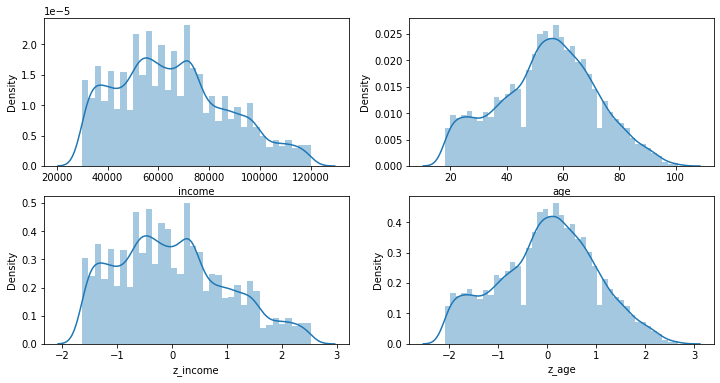

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (12, 6))

sns.distplot(df['income'], ax = ax[0,0])
sns.distplot(df['age'], ax = ax[0,1])
sns.distplot(df['z_income'], ax = ax[1,0])
sns.distplot(df['z_age'], ax = ax[1,1])

In [ ]:
df.groupby("cluster").count(
)

,person id,completed,redeemed,age,income,member_since,female,male,rc_bogo,rc_discount,rd_bogo,rd_discount,z_income,z_age
cluster,,,,,,,,,,,,,,
0,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961,2961
1,7740,7740,7740,7740,7740,7740,7740,7740,7740,7740,7740,7740,7740,7740
2,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072
3,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991
